In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import data

In [3]:
df=pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


# Fast exploration data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   int64  
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7608 non-null   object 
 6   latitude                        7608 non-null   float64
 7   longitude                       7608 non-null   float64
 8   room_type                       7608 non-null   object 
 9   price                           7608 non-null   int64  
 10  minimum_nights                  7608 non-null   int64  
 11  number_of_reviews               7608 non-null   int64  
 12  last_review                     68

In [5]:
df.shape

(7608, 18)

In [6]:
df.describe(include=["float64"]).round(3)

,neighbourhood_group,latitude,longitude,reviews_per_month
count,0.0,7608.000,7608.000,6898.000
mean,NaN,52.367,4.890,1.170
std,NaN,0.017,0.035,2.353
min,NaN,52.290,4.756,0.010
25%,NaN,52.356,4.866,0.270
50%,NaN,52.366,4.888,0.560
75%,NaN,52.376,4.908,1.260
max,NaN,52.425,5.026,114.930


# Clean data


In [7]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               7608
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        710
reviews_per_month                  710
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1134
dtype: int64

In [8]:
df.drop(columns=["neighbourhood_group"],inplace=True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   int64  
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood                   7608 non-null   object 
 5   latitude                        7608 non-null   float64
 6   longitude                       7608 non-null   float64
 7   room_type                       7608 non-null   object 
 8   price                           7608 non-null   int64  
 9   minimum_nights                  7608 non-null   int64  
 10  number_of_reviews               7608 non-null   int64  
 11  last_review                     6898 non-null   object 
 12  reviews_per_month               68

In [10]:
df.dropna(subset="reviews_per_month",inplace=True)
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1099
dtype: int64

In [11]:
df.fillna(value="No license",inplace=True)
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [71]:
df['last_review'] = pd.to_datetime(df['last_review']

SyntaxError: unexpected EOF while parsing (2146229752.py, line 1)

In [15]:
# check if duplicated
df.duplicated().sum()

0

# Explore data

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 7576
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              6898 non-null   int64         
 1   name                            6898 non-null   object        
 2   host_id                         6898 non-null   int64         
 3   host_name                       6898 non-null   object        
 4   neighbourhood                   6898 non-null   object        
 5   latitude                        6898 non-null   float64       
 6   longitude                       6898 non-null   float64       
 7   room_type                       6898 non-null   object        
 8   price                           6898 non-null   int64         
 9   minimum_nights                  6898 non-null   int64         
 10  number_of_reviews               6898 non-null   int64         
 11  last

In [20]:
df["room_type"].value_counts()

Entire home/apt    5149
Private room       1653
Hotel room           55
Shared room          41
Name: room_type, dtype: int64

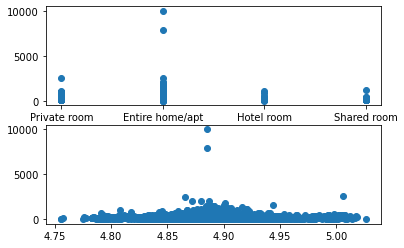

In [44]:
plt.subplot(2,1,1)
plt.scatter(x=df["room_type"],y=df["price"])
plt.subplot(2,1,2)
plt.scatter(x=df["longitude"],y=df["price"])

<AxesSubplot:>

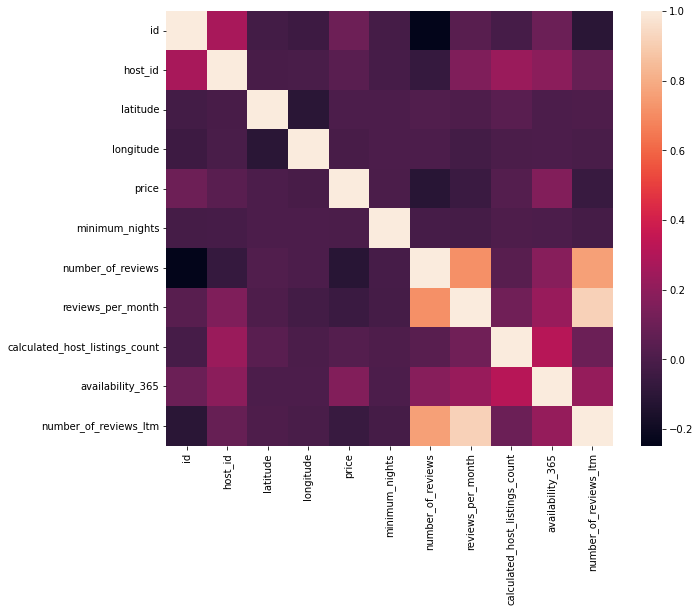

In [19]:
matrix_corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrix_corr)

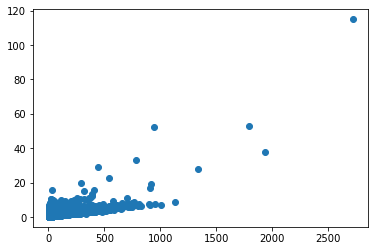

In [46]:
plt.scatter(y=df["reviews_per_month"],x=df["number_of_reviews"])

In [80]:
df.pivot_table(index="room_type",values="price",aggfunc=["count","max","min","sum"])

,count,max,min,sum
,price,price,price,price
room_type,,,,
Entire home/apt,5149,10000,18,1364253
Hotel room,55,1089,0,13131
Private room,1653,2575,30,286389
Shared room,41,1150,50,6311


In [87]:
df.groupby('room_type').agg([pd.Series.mode,'count'])['neighbourhood'].sort_values('count',ascending=False)

C:\Users\CS\AppData\Local\Temp\ipykernel_14400\3832876361.py:1: FutureWarning: ['id'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('room_type').agg([pd.Series.mode,'count'])['neighbourhood'].sort_values('count',ascending=False)


,mode,count
room_type,,
Entire home/apt,De Baarsjes - Oud-West,5149
Private room,Centrum-West,1653
Hotel room,Centrum-West,55
Shared room,Oud-Noord,41


Text(0.5, 1.0, 'Distribution of License vs. No license Listings')

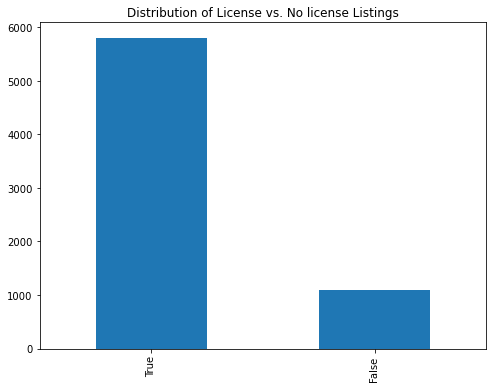

In [66]:
license_counts = df['license'].map({"No license": False}).fillna(True)
license_counts = license_counts.value_counts()
plt.figure(figsize=(8, 6))
license_counts.plot(kind='bar')
plt.title('Distribution of License vs. No license Listings')

Text(0, 0.5, 'Price')

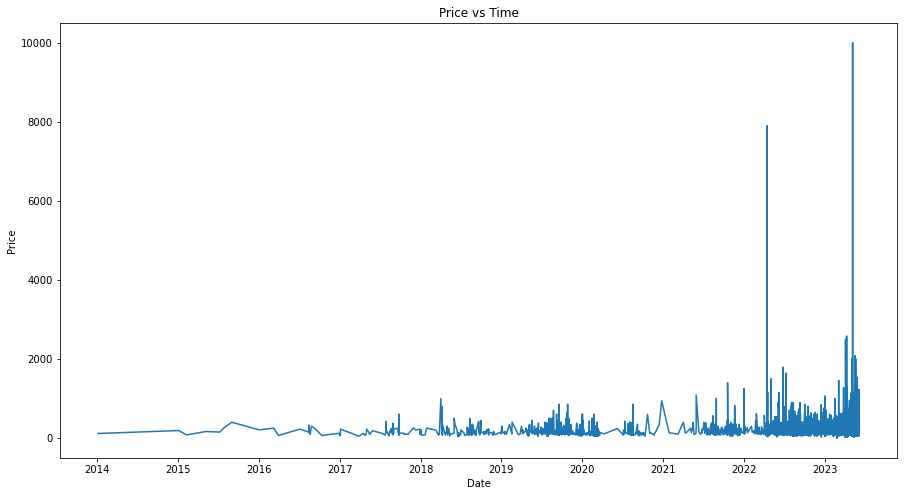

In [76]:
plt.figure(figsize=(15,8))
df.sort_values('last_review', inplace=True)
plt.plot(df['last_review'], df['price'])
plt.title('Price vs Time')
plt.xlabel('Date')
plt.ylabel('Price')

Text(0, 0.5, 'number_of_reviews')

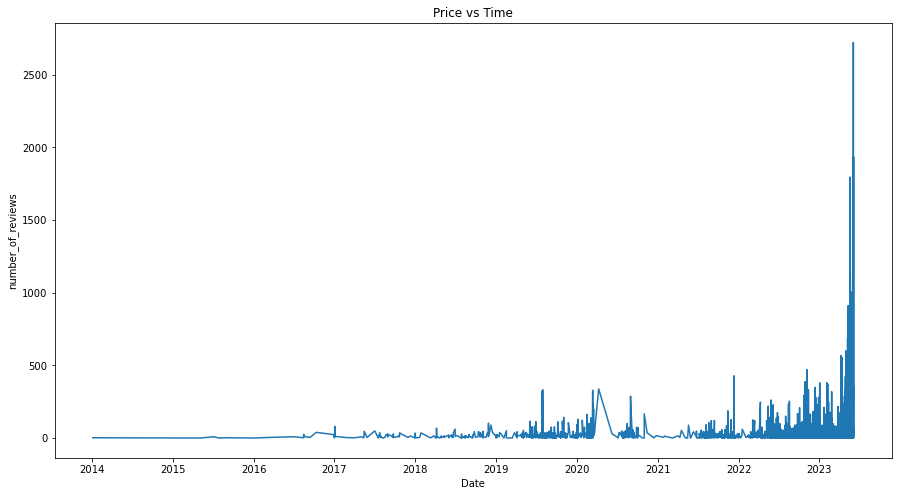

In [78]:
plt.figure(figsize=(15,8))
df.sort_values('last_review', inplace=True)
plt.plot(df['last_review'], df['number_of_reviews'])
plt.title('Price vs Time')
plt.xlabel('Date')
plt.ylabel('number_of_reviews')